In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
#importing all files
nyc = pd.read_csv('vaccine-data/nyc.csv')
houston = pd.read_csv('vaccine-data/Houston.csv')
la = pd.read_csv('vaccine-data/la.csv')
chicago = pd.read_csv('vaccine-data/chicago.csv')

## Data Cleaning

In [4]:
#starting with new york
nyc['city'] = 'new york' #adding location column
nyc['date'] = pd.to_datetime(nyc['DATE']) #converting dates to datetime

In [5]:
new_nyc = nyc[nyc['date'] >= '2021-01-01'] #filtering to consistent timeframe
new_nyc['total_doses'] = new_nyc['ADMIN_ALLDOSES_DAILY'] #getting consistent column name for vaccines administered

C:\Users\christina.sarver\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
print(new_nyc['date'].nunique()) #checking to make sure same number of days included
print(len(new_nyc))

166
166


In [7]:
#houston
houston['date'] = pd.to_datetime(houston['Date_str'])
new_houston = houston[houston['date'] >= '2021-01-01']
new_houston['total_doses'] = new_houston['Vaccinated']

C:\Users\christina.sarver\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [8]:
new_houston = new_houston.groupby(['date'], as_index=False).sum()
new_houston['city'] = 'houston'

In [9]:
# plt.plot(new_houston['date'], new_houston['total_doses'])

In [10]:
#chicago
chicago['city'] = 'chicago'
chicago['date'] = pd.to_datetime(chicago['Date'])
chicago['total_doses'] = chicago['Total Doses - Daily']
new_chicago = chicago[chicago['date'] >= '2021-01-01']

In [11]:
new_chicago['date'].nunique()

166

In [12]:
la['date'] = pd.to_datetime(la['Date (Dose 1)'])
new_la = la[la['date'] >= '2021-01-01']

In [13]:
new_la = new_la.groupby(['date'], as_index=False).sum()
new_la.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 165
Data columns (total 5 columns):
date                  166 non-null datetime64[ns]
Dose1_all             166 non-null float64
Population (16+)      166 non-null float64
Population (12-17)    166 non-null float64
Population (65+)      166 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.8 KB


In [14]:
new_la['total_doses'] = new_la['Dose1_all']
new_la['city'] = 'los angeles'

### Merging dataframes

In [15]:
def to_merge(dataframe):
    city_subset = dataframe[['date', 'city', 'total_doses']]
    return(city_subset)

In [27]:
nyc_merge = to_merge(new_nyc)
houston_merge  = to_merge(new_houston)
chicago_merge  = to_merge(new_chicago)
la_merge  = to_merge(new_la)

In [28]:
combined = pd.concat([nyc_merge, houston_merge, chicago_merge, la_merge],
                     ignore_index=True, sort=False).sort_values(by='date')
combined.head()

,date,city,total_doses
0,2021-01-01,new york,167.0
166,2021-01-01,houston,5504.0
505,2021-01-01,los angeles,1112.0
339,2021-01-01,chicago,48.0
506,2021-01-02,los angeles,4548.0


In [29]:
time_indexed_combined = combined.set_index('date')
time_indexed_combined

,city,total_doses
date,,
2021-01-01,new york,167.0
2021-01-01,houston,5504.0
2021-01-01,los angeles,1112.0
2021-01-01,chicago,48.0
2021-01-02,los angeles,4548.0
...,...,...
2021-06-18,houston,377107.0
2021-06-19,houston,377776.0
2021-06-20,houston,378260.0


In [37]:
ti_mean = time_indexed_combined.groupby('date').mean()
ti_mean.head()

,total_doses
date,
2021-01-01,1707.75
2021-01-02,4447.25
2021-01-03,3753.50
2021-01-04,10569.00
2021-01-05,12316.75


In [39]:
# #resampling by month
# ti_monthly = time_indexed_combined.resample("MS")

# ti_monthly_mean = ti_monthly.mean()

# ti_monthly_mean.head(10)

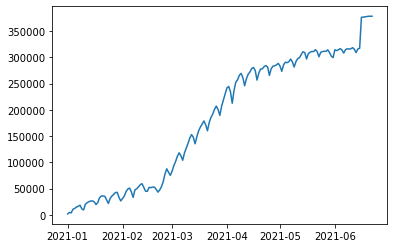

In [38]:
plt.plot(ti_mean)

In [46]:
nyc_ts = nyc_merge.set_index('date')['total_doses']
hou_ts = houston_merge.set_index('date')['total_doses']
chi_ts = chicago_merge.set_index('date')['total_doses']
la_ts = la_merge.set_index('date')['total_doses']

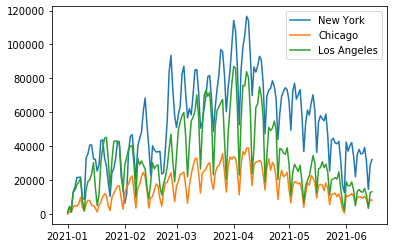

In [53]:
plt.plot(nyc_ts, label='New York')
# plt.plot(hou_ts, label='Houston')
plt.plot(chi_ts, label='Chicago')
plt.plot(la_ts, label='Los Angeles')
plt.legend()
